# Mineração de dados com a base de dados IRIS

### Análise feita por: Leonardo Flores 

## Importar as bibliotecas

In [1]:
from IPython.display import Image  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Leitura da base de dados

In [2]:
filename = 'data/Iris.csv'

df = pd.read_csv(filename, index_col=['Id'])

# Mostre as primeiras cinco linhas.
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Estrutura do Dataframe (Linhas x Colunas)
print('{} Linhas - {} Colunas'.format(*df.shape))

150 Linhas - 5 Colunas


In [4]:
# Número de amostras por espécies
df.groupby("Species").size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## Estatística Descritiva

In [5]:
# Resumo da estatística descritiva deste DF
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Variância
df.var()

SepalLengthCm    0.685694
SepalWidthCm     0.188004
PetalLengthCm    3.113179
PetalWidthCm     0.582414
dtype: float64

## Apresentação dos Dados

### Histograma

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c600e10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10fb31668>]], dtype=object)

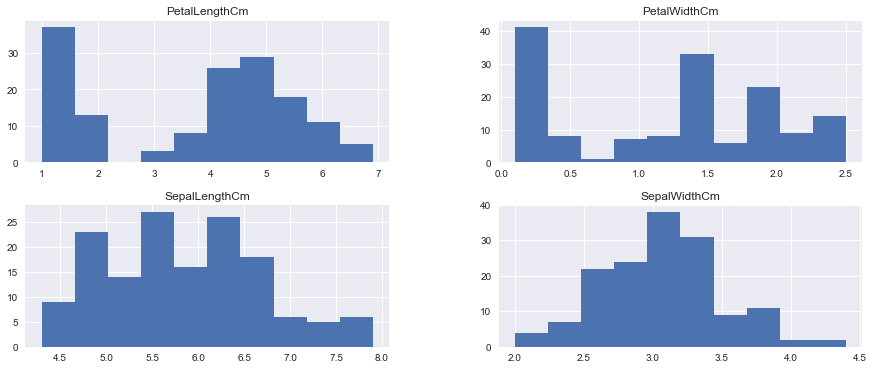

In [7]:
df.hist(figsize=(15, 6))

### Gráfico de Densidade

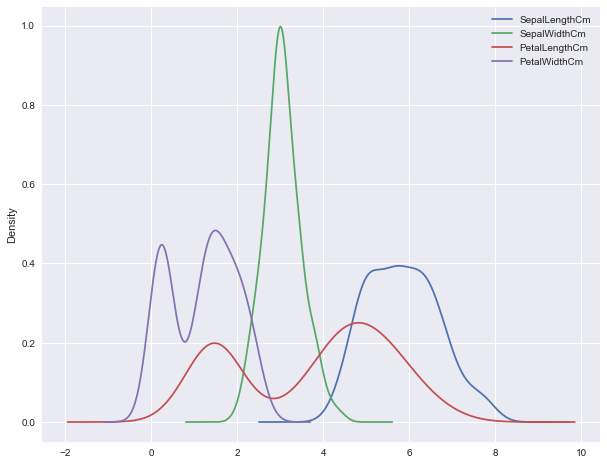

In [8]:
df.plot(kind= "density", figsize=(10,8))

### Gráfico de Barras

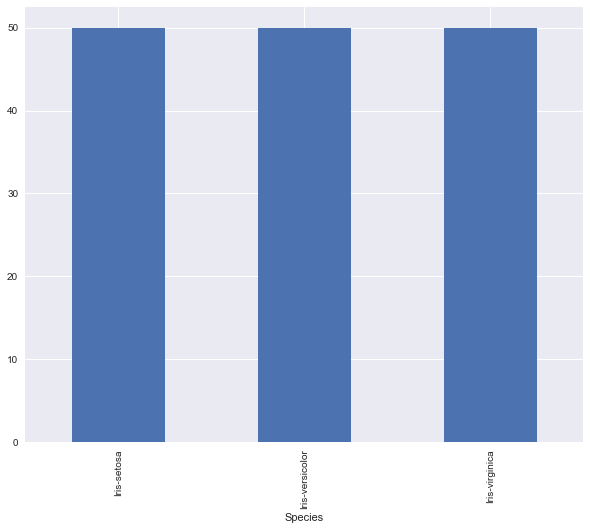

In [9]:
freq = df.groupby("Species").size()
freq.plot(kind= "bar", figsize=(10,8))

### Gráfico de Setores

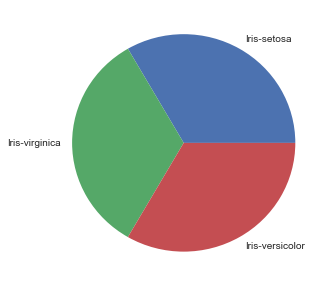

In [10]:
freq = df["Species"].value_counts()

x = freq.plot(kind= "pie", figsize=(5,5))
x.set_ylabel('')

### Covariância e Correlação

In [11]:
# Covariância
df.cov()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,0.685694,-0.039268,1.273682,0.516904
SepalWidthCm,-0.039268,0.188004,-0.321713,-0.117981
PetalLengthCm,1.273682,-0.321713,3.113179,1.296387
PetalWidthCm,0.516904,-0.117981,1.296387,0.582414


In [12]:
# Correlação
corr = df.corr()

#### Mapa de Calor da Correlação

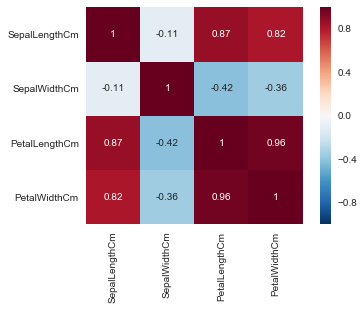

In [13]:
sns.heatmap(corr, square=True, annot=True)

### Gráfico Violino 

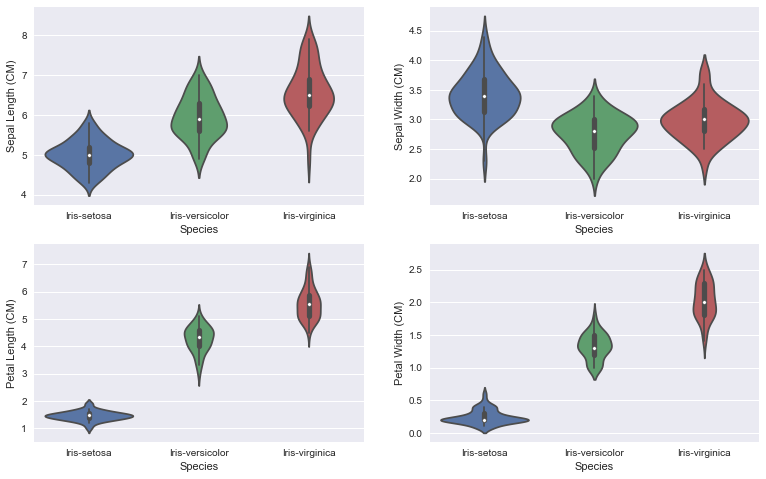

In [14]:
plt.figure(figsize=(13,8))

plt.subplot(2,2,1)
sepal_len_cht = sns.violinplot(x='Species', y='SepalLengthCm', data=df)
sepal_len_cht.set_ylabel("Sepal Length (CM)")

plt.subplot(2,2,2)
sepal_width_cht = sns.violinplot(x='Species', y='SepalWidthCm', data=df)
sepal_width_cht.set_ylabel("Sepal Width (CM)")

plt.subplot(2,2,3)
petal_len_cht = sns.violinplot(x='Species', y='PetalLengthCm', data=df)
petal_len_cht.set_ylabel("Petal Length (CM)")

plt.subplot(2,2,4)
petal_width_cht = sns.violinplot(x='Species', y='PetalWidthCm', data=df)
petal_width_cht.set_ylabel("Petal Width (CM)")

### Gráfico de dispersão

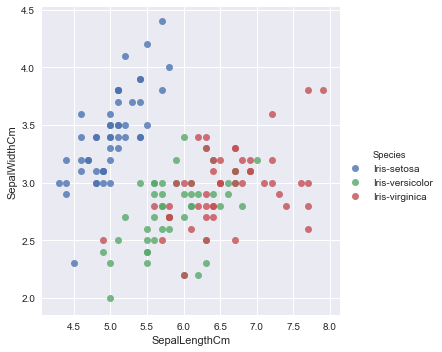

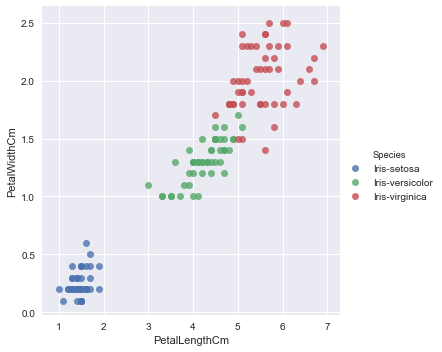

In [15]:
# Gráfico de dispersão da Comprimento x Largura da Sépala
# df.plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm')

sep_cht = sns.lmplot('SepalLengthCm', 'SepalWidthCm',
           data=df,
           fit_reg=False,
           hue="Species",  
)


pet_cht = sns.lmplot('PetalLengthCm', 'PetalWidthCm',
           data=df,
           fit_reg=False,
           hue="Species",  
)



## Resumo dos gráficos

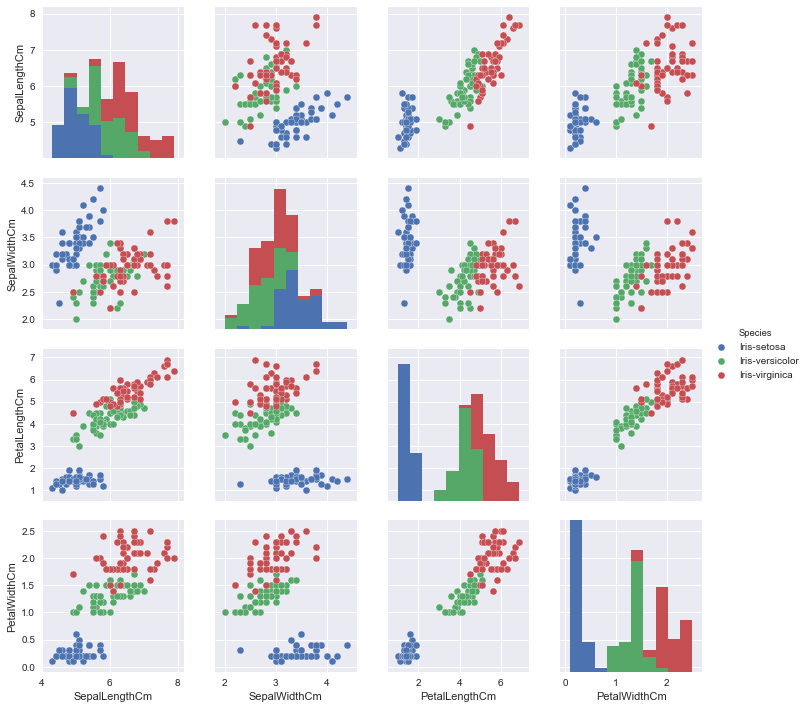

In [16]:
sns.pairplot(df, hue= "Species")

## Aprendizagem Supervisionada

### Tree

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.svm import SVC
import pydotplus

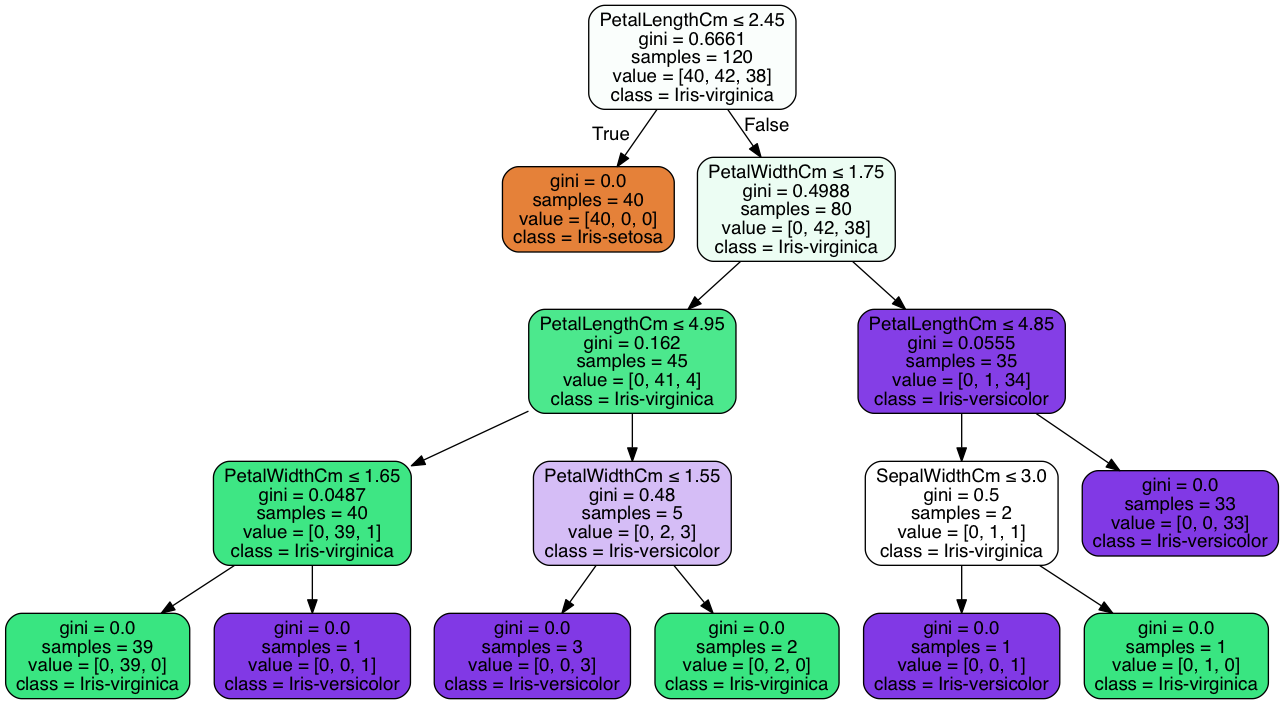

In [18]:
x = df.ix[:, :4]
y = df.ix[:, 4]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

estimator = DecisionTreeClassifier()
estimator.fit(X_train, y_train)

dot_data = export_graphviz(estimator, out_file=None, 
                         feature_names=x.columns,  
                         class_names=y.value_counts().index,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  